# Preprocesado

A veces tenemos que ajustar nuestros datos de entrada para que encajen con lo que espera el algoritmo

## Escalado de caracterísicas

Muchas veces los datos de diferentes orígenes, columnas, dimensiones, vienen en distintas escalas. 


Muy importante para:

* Algoritmos que utilicen medidas de distancia: kmeans, knearest neighbors

Puede ser interesante para:

* Regresiones/Redes neuronales para acelerar la convergencia

No es necesario para:

* Algoritmos basados en árboles


# ¿Por qué es necesario?

Cuando estamos trabajando con dataframes con múltiples variables, cada una generalmente se mueve en un rango diferente.

Ejemplo a veces tenemos datos en diferents métricas: distancia, superficie, temperatura energía, etc.. o aunque se trata de las mismas métricas se mueven en rangos diferentes. 

Para que los datos de las diferentes dimensiones sean comparables recurrimos al reescalado de dichas variables.

### Estandarización

El resultado consiste en dejar nuestros datos con media 0 y varianza 1:
\\[
X_n=\frac{X-\mu}{\sigma}
\\]


### Normalización


Las dos **normalizaciones más comunes** son:

Podemos maximizar para dejar todos nuestros datos en el rango [0,1]:
\\[
X_n=\frac{X- min\{X\} }{max\{X\}-min\{X\}}
\\]
A veces existen variaciones de esta normalización. El máximo y el mínimo puede ser peligroso si tenemos outliers, es posible que primero tengamos que eliminarlos. También podemos utilizar percentiles.

Existen infinidad de formas diferentes de normalizar los datos. 


#### Ejemplo proteinas

Dataset extraido de: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que produjeron señales detectables en la fracción nuclear del cortex. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para ratones de control, hay 38x15, o 570 mediciones, y para ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida puede considerarse como una muestra / ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender y otros no, para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Clases
* c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
* c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
* c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
* c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)

* t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
* t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
* t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
* t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)

Los niveles absolutos de expresión de un gen no son comprarables con los de otro. Para hacerlo comparables es necesario que todos los niveles de expresión se muevan en los mismos rangos.

![](https://upload.wikimedia.org/wikipedia/commons/1/14/Extended_Central_Dogma_with_Enzymes_gl.png)

In [1]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
#mouse_data<-mouse[,c(2:78,79)]
mouse_data<-mouse[,c(2:78,82)]
head(mouse_data)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,⋯,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.5036439,0.7471932,0.4301753,2.816329,5.990152,0.2188300,0.1775655,2.373744,0.2322238,1.750936,⋯,0.1226520,NA,0.1063052,0.1083359,0.4270992,0.1147832,0.1317900,0.1281856,1.675652,c-CS-m
2,0.5146171,0.6890635,0.4117703,2.789514,5.685038,0.2116362,0.1728170,2.292150,0.2269721,1.596377,⋯,0.1166822,NA,0.1065922,0.1043154,0.4415813,0.1119735,0.1351030,0.1311187,1.743610,c-CS-m
3,0.5091831,0.7302468,0.4183088,2.687201,5.622059,0.2090109,0.1757222,2.283337,0.2302468,1.561316,⋯,0.1185082,NA,0.1083031,0.1062193,0.4357769,0.1118829,0.1333618,0.1274311,1.926427,c-CS-m
4,0.4421067,0.6170762,0.3586263,2.466947,4.979503,0.2228858,0.1764626,2.152301,0.2070042,1.595086,⋯,0.1327812,NA,0.1031838,0.1112620,0.3916910,0.1304053,0.1474442,0.1469011,1.700563,c-CS-m
5,0.4349402,0.6174298,0.3588022,2.365785,4.718679,0.2131059,0.1736270,2.134014,0.1921579,1.504230,⋯,0.1299541,NA,0.1047838,0.1106939,0.4341538,0.1184814,0.1403143,0.1483799,1.839730,c-CS-m
6,0.4475064,0.6281758,0.3673881,2.385939,4.807635,0.2185778,0.1762334,2.141282,0.1951875,1.442398,⋯,0.1315752,NA,0.1064762,0.1094457,0.4398331,0.1166572,0.1407664,0.1421804,1.816389,c-CS-m


Comprobamos que los margenes en los que se mueve el nivel de expresión de cada gen es muy diferente y los hace dificilmente comparables.

In [2]:
summary(mouse_data)

    DYRK1A_N         ITSN1_N           BDNF_N           NR1_N      
 Min.   :0.1453   Min.   :0.2454   Min.   :0.1152   Min.   :1.331  
 1st Qu.:0.2881   1st Qu.:0.4734   1st Qu.:0.2874   1st Qu.:2.057  
 Median :0.3664   Median :0.5658   Median :0.3166   Median :2.297  
 Mean   :0.4258   Mean   :0.6171   Mean   :0.3191   Mean   :2.297  
 3rd Qu.:0.4877   3rd Qu.:0.6980   3rd Qu.:0.3482   3rd Qu.:2.528  
 Max.   :2.5164   Max.   :2.6027   Max.   :0.4972   Max.   :3.758  
 NA's   :3        NA's   :3        NA's   :3        NA's   :3      
     NR2A_N          pAKT_N           pBRAF_N          pCAMKII_N    
 Min.   :1.738   Min.   :0.06324   Min.   :0.06404   Min.   :1.344  
 1st Qu.:3.156   1st Qu.:0.20575   1st Qu.:0.16459   1st Qu.:2.480  
 Median :3.761   Median :0.23118   Median :0.18230   Median :3.327  
 Mean   :3.844   Mean   :0.23317   Mean   :0.18185   Mean   :3.537  
 3rd Qu.:4.440   3rd Qu.:0.25726   3rd Qu.:0.19742   3rd Qu.:4.482  
 Max.   :8.483   Max.   :0.53905   Max.   

Warning message:
“Removed 3 rows containing missing values (geom_point).”


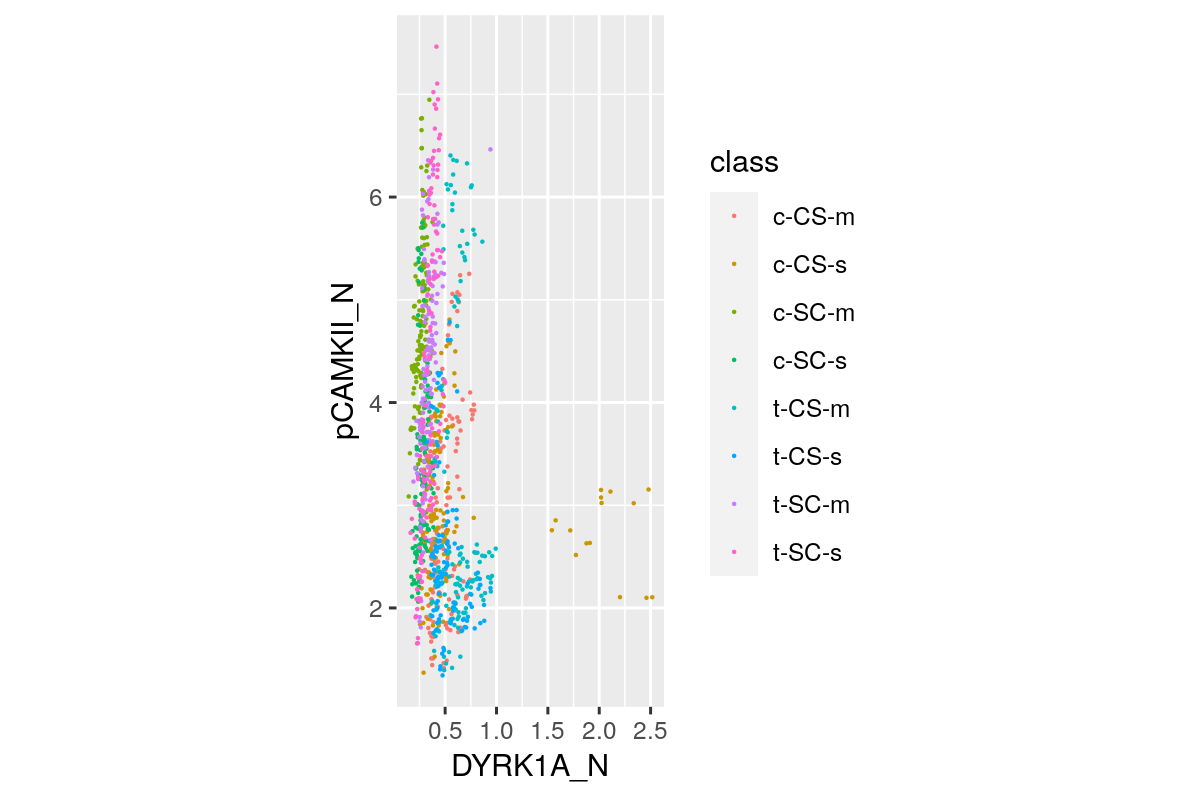

In [3]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

ggplot(mouse_data,aes(x=DYRK1A_N,y=pCAMKII_N,color=class))+geom_point(size=0.1)+ coord_fixed() 

Tras aplicar una normalización podemos comparar su nivel de expresión con mayor claridad y ver que influye en cada clase:

In [4]:
library(pracma)
mouse_data_noclass<-mouse_data
mouse_data_noclass$class<-NULL
gem_m<-colMeans(mouse_data_noclass,na.rm = T)
gem_sd<-sapply(mouse_data_noclass, sd,na.rm=T)
mnCols<-repmat(gem_m,n = nrow(mouse_data_noclass),m=1)
sdCols<-repmat(gem_sd,n = nrow(mouse_data_noclass),m=1)
mouse_data_norm<-(mouse_data_noclass-mnCols)/sdCols
mouse_data_norm$class<-mouse_data$class

In [5]:
# Otra forma de hacer lo mismo utilizando funciones de R
mouse_data_noclass<-mouse_data
mouse_data_noclass$class<-NULL

mouse_data_norm<-as.data.frame(apply(mouse_data_noclass,2,scale,center=TRUE,scale=TRUE))
mouse_data_norm$class<-mouse_data$class

In [6]:
summary(mouse_data_norm)

    DYRK1A_N          ITSN1_N            BDNF_N             NR1_N          
 Min.   :-1.1248   Min.   :-1.4773   Min.   :-4.12908   Min.   :-2.782776  
 1st Qu.:-0.5522   1st Qu.:-0.5712   1st Qu.:-0.64079   1st Qu.:-0.690650  
 Median :-0.2383   Median :-0.2039   Median :-0.05111   Median :-0.002082  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.2482   3rd Qu.: 0.3216   3rd Qu.: 0.58945   3rd Qu.: 0.665756  
 Max.   : 8.3836   Max.   : 7.8905   Max.   : 3.60592   Max.   : 4.205016  
 NA's   :3         NA's   :3         NA's   :3          NA's   :3          
     NR2A_N             pAKT_N            pBRAF_N           pCAMKII_N      
 Min.   :-2.25741   Min.   :-4.08152   Min.   :-4.35631   Min.   :-1.6933  
 1st Qu.:-0.73760   1st Qu.:-0.65843   1st Qu.:-0.63797   1st Qu.:-0.8163  
 Median :-0.08904   Median :-0.04783   Median : 0.01685   Median :-0.1626  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.

Warning message:
“Removed 3 rows containing missing values (geom_point).”


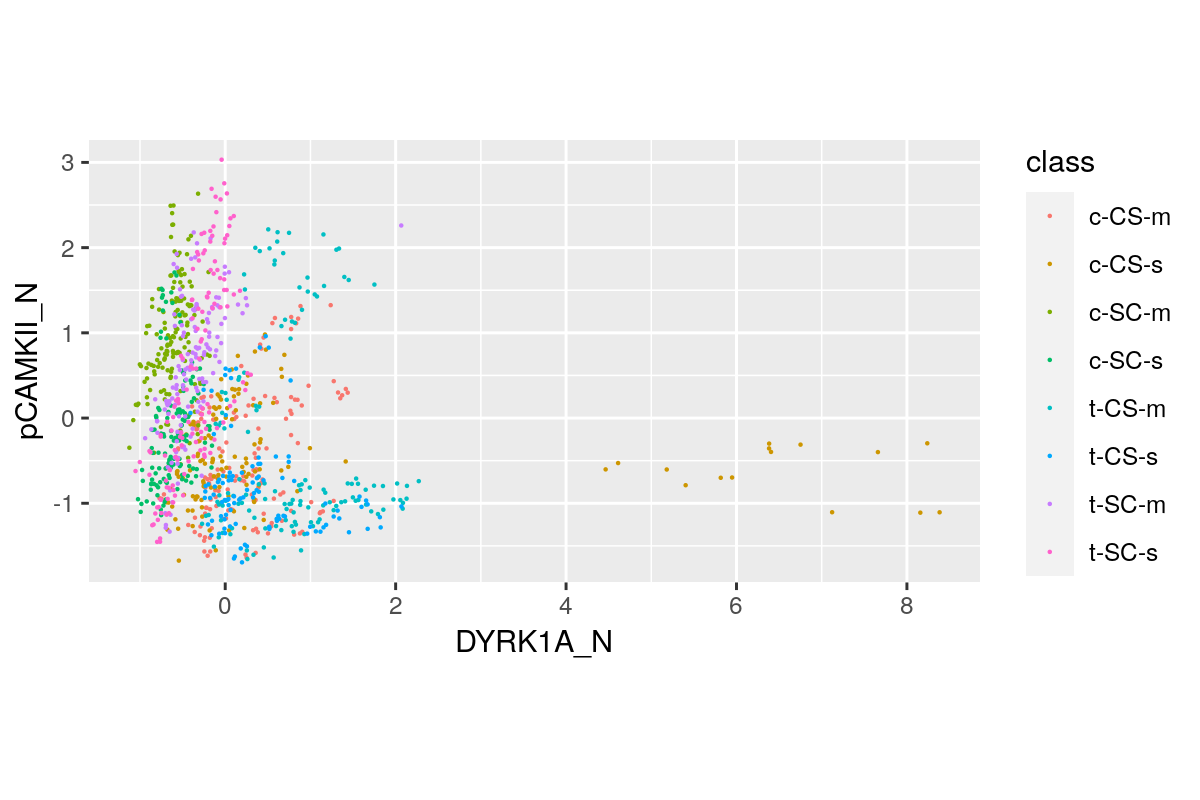

In [7]:
ggplot(mouse_data_norm,aes(x=DYRK1A_N,y=pCAMKII_N,color=class))+geom_point(size=0.1)+ coord_fixed() 

### Ejemplo

Recuperemos el ejemplo de la predicción de la potencia de generación de una central de ciclo combinado

El conjunto de datos contiene 9568 puntos de datos recopilados de una Central de Ciclo Combinado durante 6 años (2006-2011), cuando la planta de energía se puso a funcionar con carga completa. Las características consisten en variables ambientales promedio por hora, Temperatura (T), Presión ambiente (AP), Humedad relativa (HR) y Vacío de escape (V) para predecir la producción neta de energía eléctrica por hora (EP) de la planta.

Las características consisten en variables ambientales promedio por hora
- Temperatura (AT) en el rango de 1.81 ° C y 37.11 ° C,
- Presión ambiental (AP) en el rango de 992.89-1033.30 milibares,
- Humedad relativa (HR) en el rango de 25.56% a 100.16%
- Vacío de escape (V) en el rango de 25.36-81.56 cm Hg
- Producción neta de energía eléctrica por hora (EP) 420.26-495.76 MW

Los promedios se toman de varios sensores ubicados alrededor de la planta que registran las variables ambientales cada segundo. Las variables se dan sin normalización.


https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant


Cada columna, cada variable viene uno un rango de funcionamiento diferente y es dificil comparalro entre ellos.

In [1]:
powerplant<-read.csv("data/powerplant.csv")

In [2]:
idx<-sample(1:nrow(powerplant),nrow(powerplant)*0.7)
powerplant.train<-powerplant[idx,]
powerplant.test <-powerplant[-idx,]

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



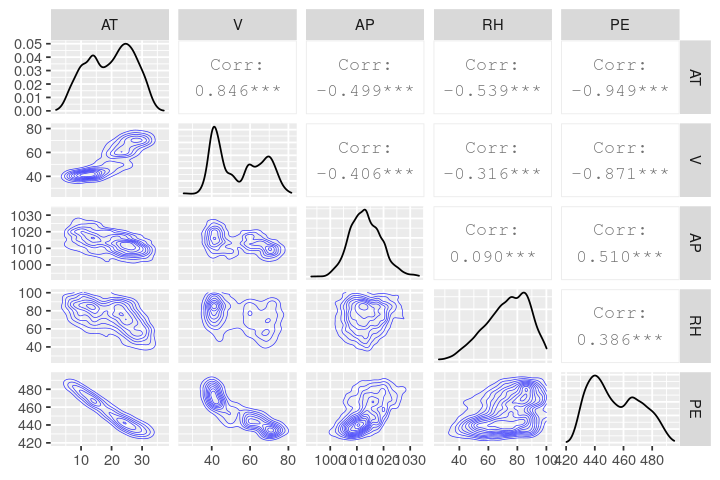

In [3]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=6)
ggpairs(powerplant.train, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [4]:
set.seed(1234)

model_powerplant<-lm(PE~.,data=powerplant.train)
summary(model_powerplant)


Call:
lm(formula = PE ~ ., data = powerplant.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.077  -3.137  -0.160   3.181  17.824 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 458.412253  11.523387   39.781  < 2e-16 ***
AT           -1.984541   0.018007 -110.211  < 2e-16 ***
V            -0.234451   0.008675  -27.026  < 2e-16 ***
AP            0.058579   0.011183    5.238 1.67e-07 ***
RH           -0.159372   0.004879  -32.662  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.52 on 6692 degrees of freedom
Multiple R-squared:  0.9303,	Adjusted R-squared:  0.9303 
F-statistic: 2.233e+04 on 4 and 6692 DF,  p-value: < 2.2e-16


In [5]:
powerplant.test$pe_est<-predict(model_powerplant,powerplant.test)
paste("Error cuadrático medio",sqrt(mean((powerplant.test$PE-powerplant.test$pe_est)^2)))

[1] "Error cuadrático medio 4.64664364464558"

Podemos escalar nuestros datos para que todos esten en el mismo rango. 

Habría que hacerlo solo con los elementos de train, porque se supone que los datos de test no los hemos visto nunca.

In [6]:
#gem_m<-colMeans(powerplant.train)
#gem_sd<-sapply(powerplant.train, sd,na.rm=T)
#mnCols<-repmat(gem_m,n = nrow(powerplant.train),m=1)
#sdCols<-repmat(gem_sd,n = nrow(powerplant.train),m=1)

#powerplant_norm.train<- (powerplant.train-mnCols)/sdCols
#preProcValues$mean
#preProcValues$std

In [8]:
library(dplyr)
preProcValues <- powerplant.train %>% select(-PE) %>% caret::preProcess( method = c("center", "scale"))

powerplant_norm.train<-predict(preProcValues, powerplant.train)
summary(powerplant_norm.train)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




       AT                 V                 AP                 RH         
 Min.   :-2.38800   Min.   :-2.2838   Min.   :-3.44861   Min.   :-3.2239  
 1st Qu.:-0.82383   1st Qu.:-0.9873   1st Qu.:-0.69955   1st Qu.:-0.6810  
 Median : 0.09753   Median :-0.1740   Median :-0.05112   Median : 0.1144  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.81266   3rd Qu.: 0.9638   3rd Qu.: 0.67836   3rd Qu.: 0.7859  
 Max.   : 2.33934   Max.   : 2.1537   Max.   : 3.37507   Max.   : 1.8340  
       PE       
 Min.   :420.3  
 1st Qu.:439.8  
 Median :451.5  
 Mean   :454.4  
 3rd Qu.:468.5  
 Max.   :495.4  

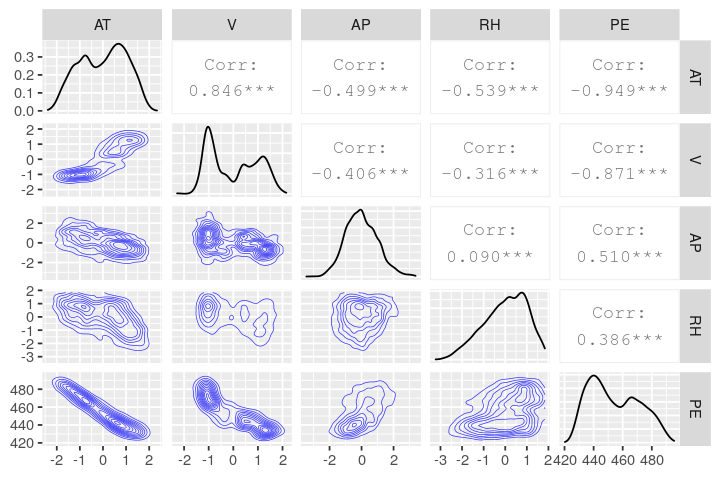

In [9]:
ggpairs(powerplant_norm.train, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       )

In [10]:
model_powerplant_norm<-lm(PE~.,data=powerplant_norm.train)
summary(model_powerplant_norm)


Call:
lm(formula = PE ~ ., data = powerplant_norm.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.077  -3.137  -0.160   3.181  17.824 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 454.39374    0.05524 8226.476  < 2e-16 ***
AT          -14.81895    0.13446 -110.211  < 2e-16 ***
V            -2.96931    0.10987  -27.026  < 2e-16 ***
AP            0.34691    0.06622    5.238 1.67e-07 ***
RH           -2.34025    0.07165  -32.662  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.52 on 6692 degrees of freedom
Multiple R-squared:  0.9303,	Adjusted R-squared:  0.9303 
F-statistic: 2.233e+04 on 4 and 6692 DF,  p-value: < 2.2e-16


In [11]:
powerplant_norm.train$pe_est<-predict(model_powerplant_norm,powerplant_norm.train)
paste("Error cuadrático medio",sqrt(mean((powerplant_norm.train$PE-powerplant_norm.train$pe_est)^2)))

[1] "Error cuadrático medio 4.51852277080142"

In [66]:
powerplant_norm.train<-predict(preProcValues, powerplant_norm.train)
summary(powerplant_norm.train)

       AT               V                AP               RH        
 Min.   :-2.949   Min.   :-4.449   Min.   :-170.0   Min.   :-5.219  
 1st Qu.:-2.740   1st Qu.:-4.348   1st Qu.:-169.5   1st Qu.:-5.043  
 Median :-2.617   Median :-4.284   Median :-169.4   Median :-4.989  
 Mean   :-2.630   Mean   :-4.270   Mean   :-169.4   Mean   :-4.997  
 3rd Qu.:-2.521   3rd Qu.:-4.195   3rd Qu.:-169.3   3rd Qu.:-4.943  
 Max.   :-2.341   Max.   :-4.110   Max.   :-168.9   Max.   :-4.871  
       PE            pe_est     
 Min.   :420.3   Min.   :421.2  
 1st Qu.:439.8   1st Qu.:440.5  
 Median :451.8   Median :452.1  
 Mean   :454.4   Mean   :454.4  
 3rd Qu.:468.5   3rd Qu.:468.8  
 Max.   :495.8   Max.   :493.4  

In [12]:
powerplant_norm.test<-predict(preProcValues, powerplant.test)

powerplant_norm.test$pe_est<-predict(model_powerplant_norm,powerplant_norm.test)
paste("Error cuadrático medio",sqrt(mean((powerplant_norm.test$PE-powerplant_norm.test$pe_est)^2)))

[1] "Error cuadrático medio 4.64664364464558"

In [68]:
library(microbenchmark)
set.seed(50)
mb<-microbenchmark(lm(PE~.,data=powerplant.train),times=1000)
print(mb)
set.seed(50)
mb<-microbenchmark(lm(PE~.,data=powerplant_norm.train),times=1000)
print(mb)

Unit: milliseconds
                                expr      min      lq     mean  median       uq
 lm(PE ~ ., data = powerplant.train) 2.902124 2.96881 3.565528 3.11661 3.435356
      max neval
 215.8896  1000
Unit: milliseconds
                                     expr      min      lq     mean   median
 lm(PE ~ ., data = powerplant_norm.train) 3.346598 3.43431 3.768346 3.505799
       uq      max neval
 3.679702 10.08549  1000


In [69]:
?microbenchmark

In [70]:
set.seed(50)
mb<-microbenchmark(glm(PE~.,data=powerplant.train),times=1000)
print(mb)
set.seed(50)
mb<-microbenchmark(glm(PE~.,data=powerplant_norm.train),times=1000)
print(mb)

Unit: milliseconds
                                 expr      min       lq    mean   median
 glm(PE ~ ., data = powerplant.train) 6.120649 6.313589 6.93238 6.422769
       uq      max neval
 6.654581 15.13317  1000
Unit: milliseconds
                                      expr      min       lq     mean   median
 glm(PE ~ ., data = powerplant_norm.train) 6.885876 7.253062 8.441236 7.507525
       uq      max neval
 8.077132 216.0687  1000


## Transformación de variable

A veces se transforma la variable para conseguir que su distribución siga una normal y/o varianza constante. Una de las tecnicas consiste en buscar el parámetro $\lambda$ que maximiza el estimador de máxima verosimilitud:

\\[
f(y,\lambda)\left\{\begin{matrix}
\frac{y^\lambda-1}{\lambda} ~~ si~~ \lambda \neq 0\\ 
log(y) ~~ si~~ \lambda = 0\\ 
\end{matrix}\right.
\\]
Esta transformaxión se suele conocer como la transformación box-cox. Funciona para valores estrictamente positivos.



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




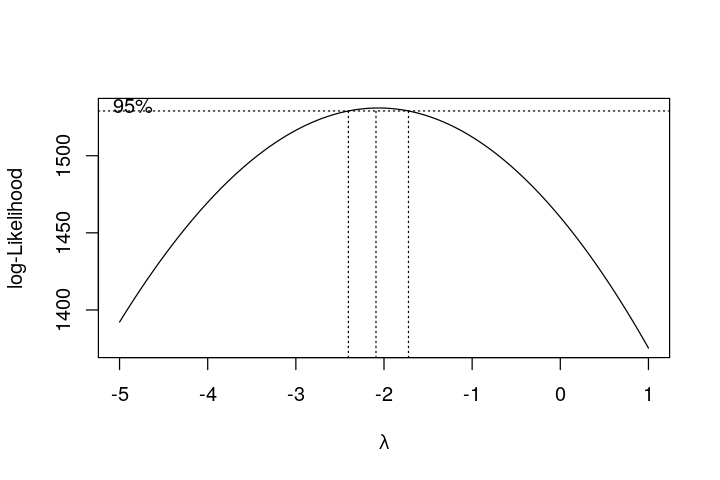

In [13]:
library(MASS)
bx<-boxcox(model_powerplant,lambda=seq(-5,1,length.out = 100))

In [14]:
l<-bx$x[which.max(bx$y)]
my_transform<-function(y,l){
    (y^l-1)/l
}

In [15]:
powerplant_transformed.train<-powerplant.train
powerplant_transformed.train$PE_tr<-my_transform(powerplant.train$PE,l)
model_powerplant_tr<-lm(PE_tr~AT+V+AP+RH,data=powerplant_transformed.train)

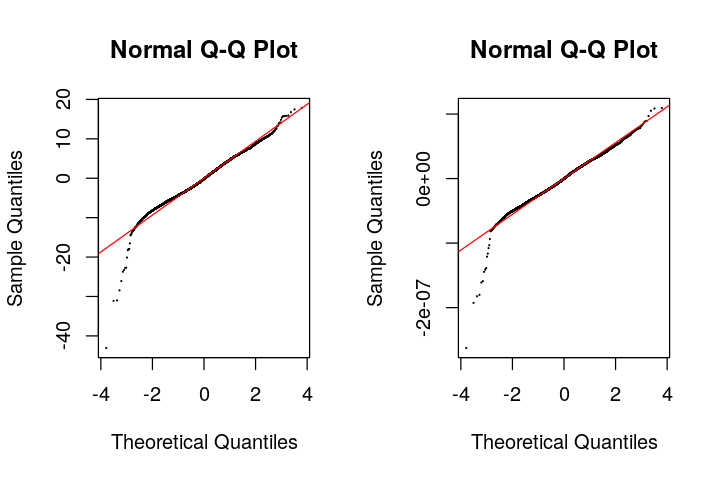

In [16]:
par(mfrow = c(1,2))
qqnorm(y=model_powerplant$residuals,cex=0.1)
qqline(y=model_powerplant$residuals,cex=0.1,col="red")

qqnorm(y=model_powerplant_tr$residuals,cex=0.1)
qqline(y=model_powerplant_tr$residuals,cex=0.1,col="red")


### Ejemplo hormigón

In [1]:
concrete<-read.csv("data/Concrete_Data.csv",
                   col.names=c("cemento","escoria","cenizas","agua","plastificante","aggrueso","agfino","edad","resistencia"))
head(concrete)

,cemento,escoria,cenizas,agua,plastificante,aggrueso,agfino,edad,resistencia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


In [2]:
set.seed(123)
idx<-sample(1:nrow(concrete),nrow(concrete)*0.7)
concrete_train.df<-concrete[idx,]
concrete_test.df<-concrete[-idx,]

In [3]:
#model_concrete<-lm(resistencia~cemento+escoria+cenizas+agua+plastificante+aggrueso+agfino+edad,concrete_train.df)
model_concrete<-lm(resistencia~cemento+escoria+cenizas+agua+plastificante+aggrueso+agfino+edad,concrete_train.df)
summary(model_concrete)


Call:
lm(formula = resistencia ~ cemento + escoria + cenizas + agua + 
    plastificante + aggrueso + agfino + edad, data = concrete_train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.889  -6.034   0.641   6.814  34.756 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -32.424871  29.849587  -1.086   0.2777    
cemento         0.116263   0.009805  11.857  < 2e-16 ***
escoria         0.101461   0.011539   8.793  < 2e-16 ***
cenizas         0.078485   0.014664   5.352 1.17e-07 ***
agua           -0.107379   0.044664  -2.404   0.0165 *  
plastificante   0.508507   0.112251   4.530 6.91e-06 ***
aggrueso        0.022547   0.010573   2.132   0.0333 *  
agfino          0.016883   0.012174   1.387   0.1659    
edad            0.121806   0.006753  18.037  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.06 on 712 degrees of freedom
Multiple R-squared:  0.6293,	Adjusted R-squared:  0.

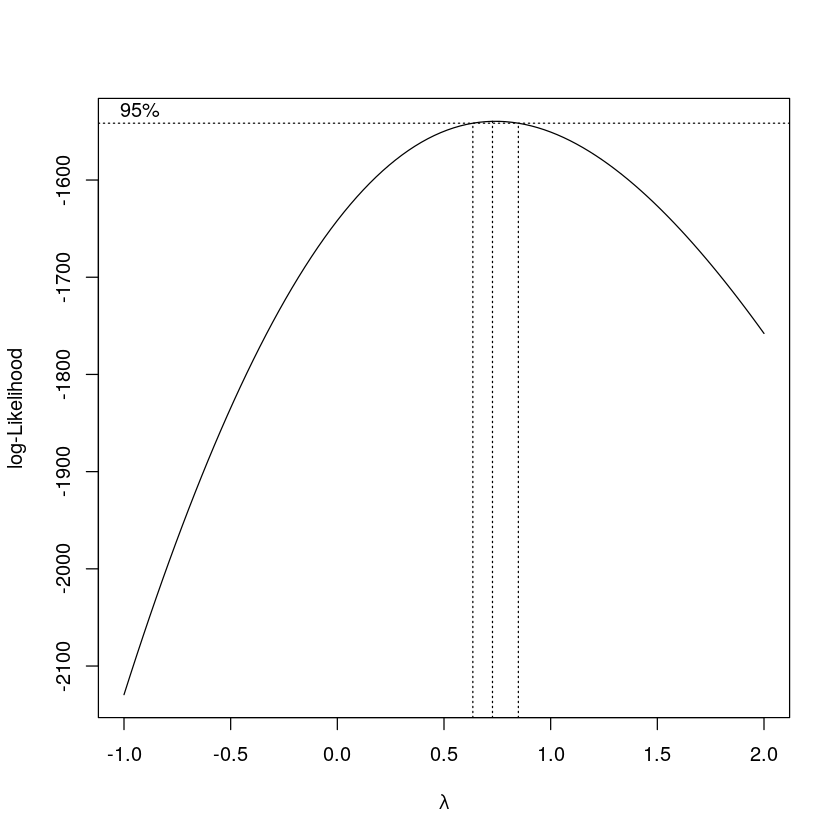

In [4]:
bx<-MASS::boxcox(model_concrete,lambda=seq(-1,2,length.out = 100))

In [5]:
l<-bx$x[which.max(bx$y)]
my_transform<-function(y,l){
    (y^l-1)/l
}
my_inv_transform<-function(x,l){
    (x*l+1)^(1/l)
}
l

[1] 0.7272727

In [6]:
concrete_transformed.train<-concrete_train.df
concrete_transformed.train$resistencia_tr<-my_transform(concrete_train.df$resistencia,l)


model_concrete_tr<-lm(resistencia_tr~cemento+escoria+cenizas+agua+plastificante+aggrueso+agfino+edad,
                      concrete_transformed.train)
summary(model_concrete_tr)


Call:
lm(formula = resistencia_tr ~ cemento + escoria + cenizas + agua + 
    plastificante + aggrueso + agfino + edad, data = concrete_transformed.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.325  -2.535   0.506   2.718  11.650 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -8.471518  11.496746  -0.737   0.4614    
cemento        0.044198   0.003777  11.703  < 2e-16 ***
escoria        0.038120   0.004444   8.577  < 2e-16 ***
cenizas        0.031115   0.005648   5.509 5.04e-08 ***
agua          -0.039251   0.017203  -2.282   0.0228 *  
plastificante  0.190036   0.043234   4.395 1.27e-05 ***
aggrueso       0.008125   0.004072   1.995   0.0464 *  
agfino         0.005621   0.004689   1.199   0.2311    
edad           0.047335   0.002601  18.199  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.876 on 712 degrees of freedom
Multiple R-squared:  0.6239,	Adjusted R-squared:  

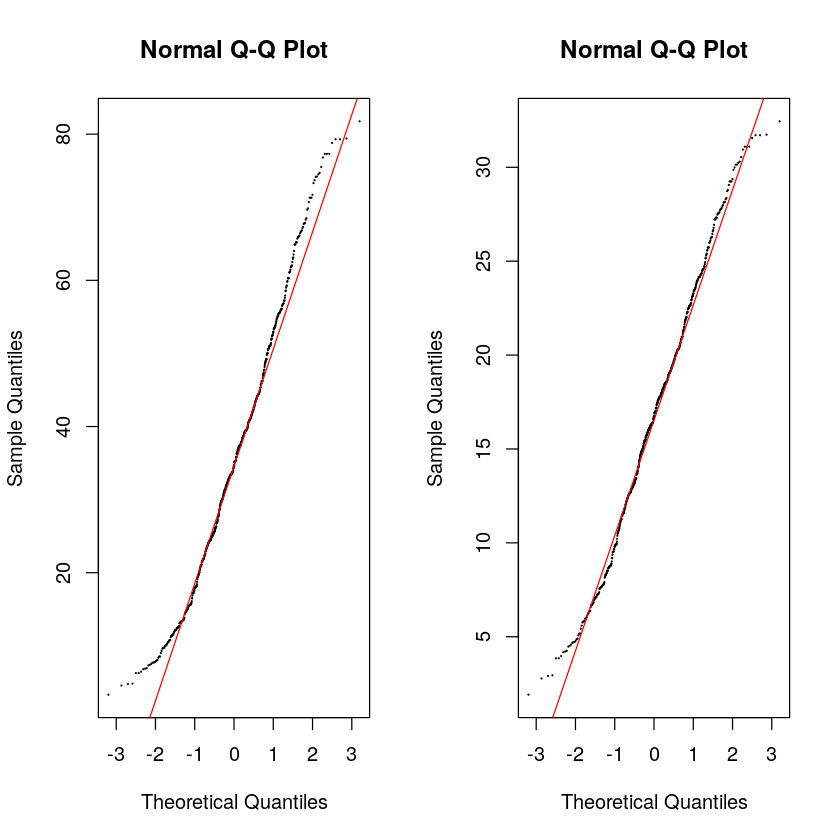

In [7]:
par(mfrow = c(1,2))
qqnorm(y=concrete_transformed.train$resistencia,cex=0.1)
qqline(y=concrete_transformed.train$resistencia,cex=0.1,col="red")

qqnorm(y=concrete_transformed.train$resistencia_tr,cex=0.1)
qqline(y=concrete_transformed.train$resistencia_tr,cex=0.1,col="red")

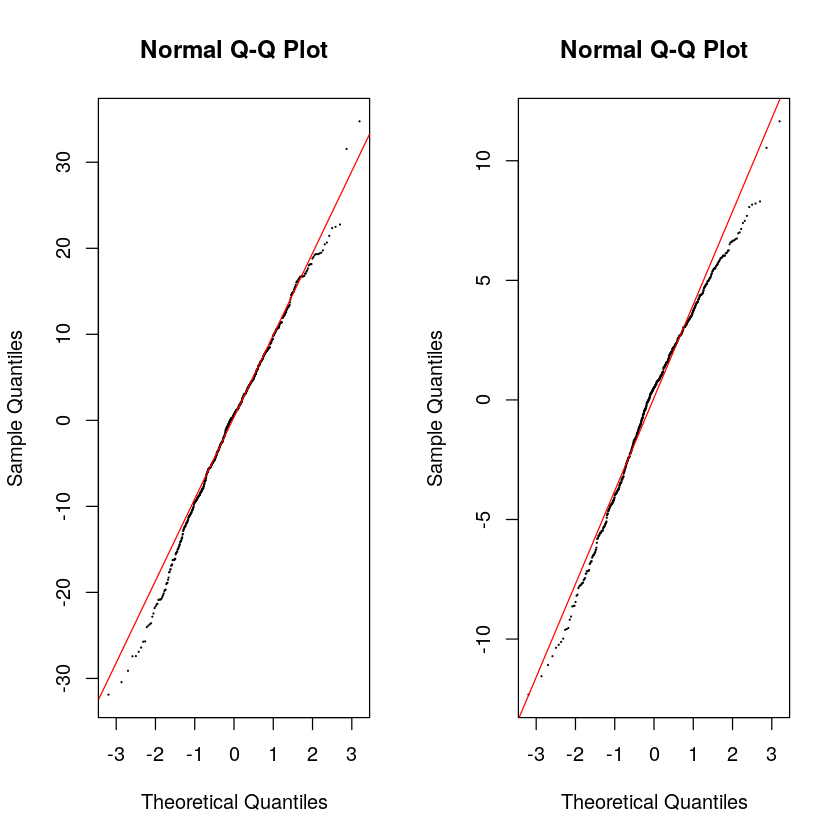

In [8]:
par(mfrow = c(1,2))
qqnorm(y=model_concrete$residuals,cex=0.1)
qqline(y=model_concrete$residuals,cex=0.1,col="red")

qqnorm(y=model_concrete_tr$residuals,cex=0.1)
qqline(y=model_concrete_tr$residuals,cex=0.1,col="red")


In [9]:
pred_train<-concrete_transformed.train[,c("resistencia_tr")]

RMSE   Rsquared        MAE 
11.3208247  0.5812288  8.9590933

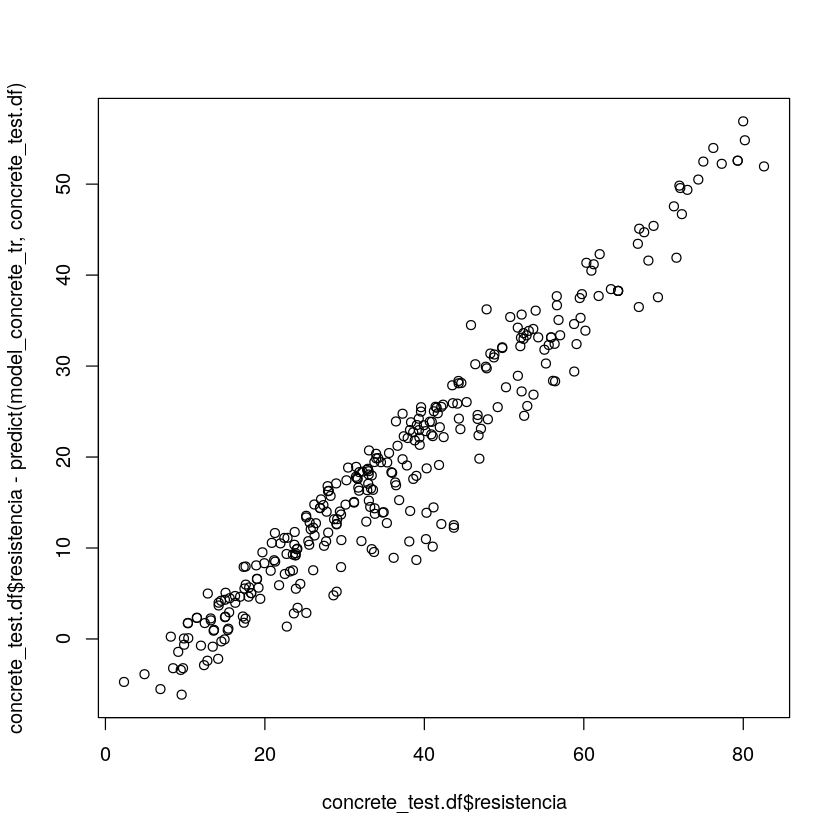

In [10]:
caret::postResample(concrete_test.df$resistencia,
                    predict(model_concrete,concrete_test.df))
plot(concrete_test.df$resistencia,
     concrete_test.df$resistencia-predict(model_concrete_tr,concrete_test.df))

     RMSE  Rsquared       MAE 
4.2747521 0.5821341 3.4317847 
      RMSE   Rsquared        MAE 
11.6336432  0.5624026  9.1334637 


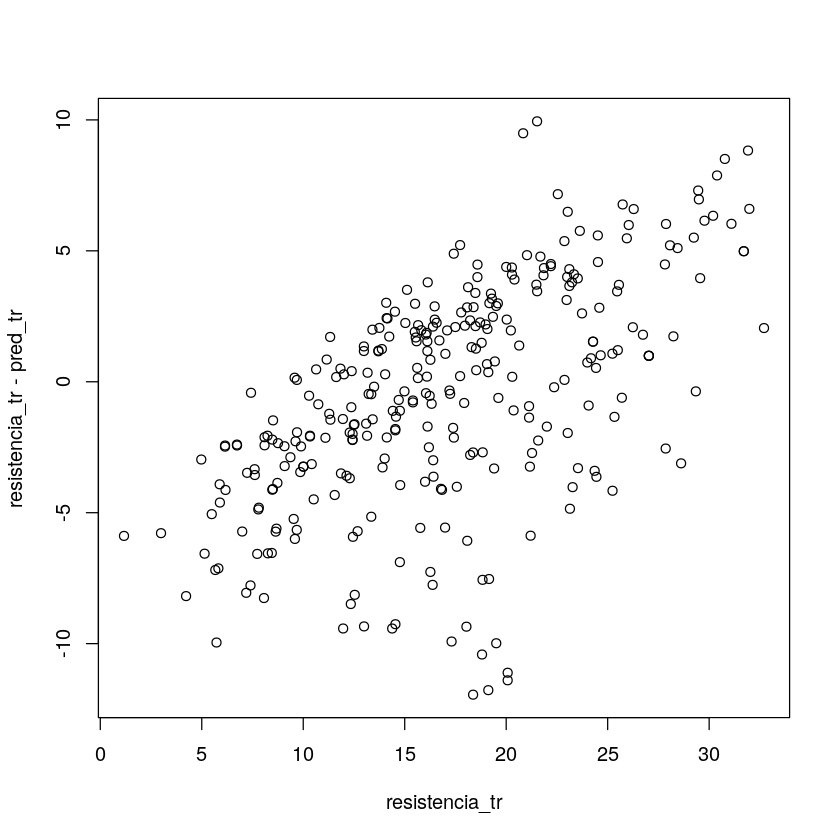

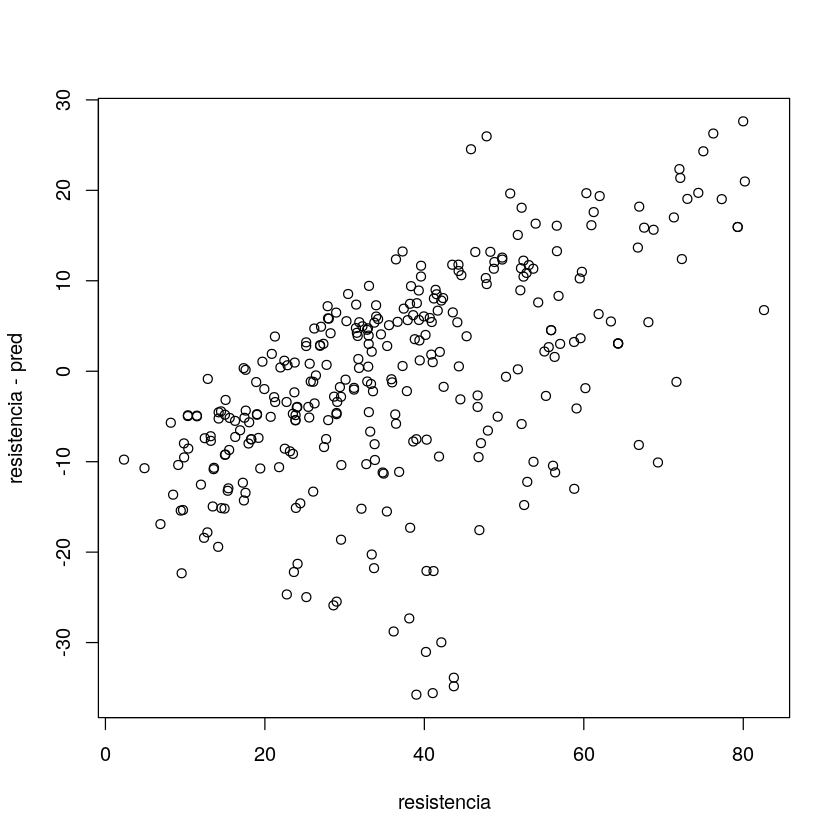

In [11]:
concrete_transformed.test<-concrete_test.df
concrete_transformed.test$resistencia_tr<-my_transform(concrete_test.df$resistencia,l)
concrete_transformed.test$pred_tr<-predict(model_concrete_tr,concrete_transformed.test)
concrete_transformed.test$pred<-my_inv_transform(concrete_transformed.test$pred_tr,l)

with(concrete_transformed.test,{
        
    print(caret::postResample(resistencia_tr,pred_tr))
    print(caret::postResample(resistencia,pred))
    plot(resistencia_tr, resistencia_tr-pred_tr)
    plot(resistencia, resistencia-pred)
    })


RMSE  Rsquared       MAE 
8.5418552 0.7588324 6.4947703

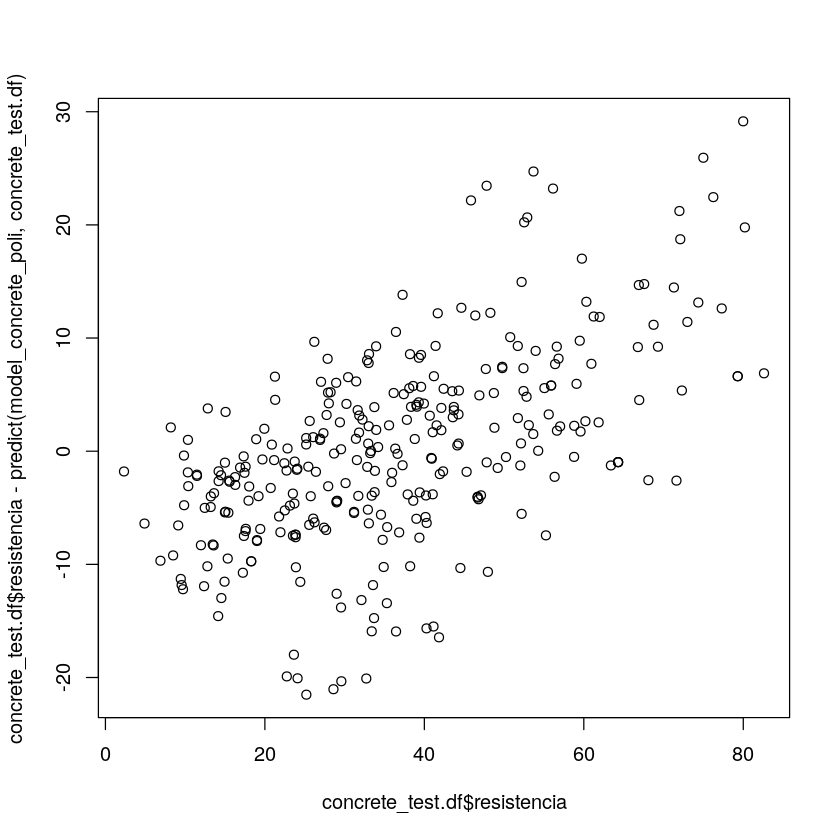

In [12]:
model_concrete_poli<-lm(
    resistencia~poly(cemento,2)+poly(escoria,2)+poly(cenizas,2)+poly(agua,2)+
    poly(plastificante,2)+poly(aggrueso,2)+poly(agfino,2)+poly(edad,2),
                      concrete_train.df)
caret::postResample(concrete_test.df$resistencia,predict(model_concrete_poli,concrete_test.df))
plot(concrete_test.df$resistencia,
     concrete_test.df$resistencia-predict(model_concrete_poli,concrete_test.df))

    RMSE Rsquared      MAE 
3.192568 0.762264 2.475372 
     RMSE  Rsquared       MAE 
8.5831255 0.7554855 6.5124326 


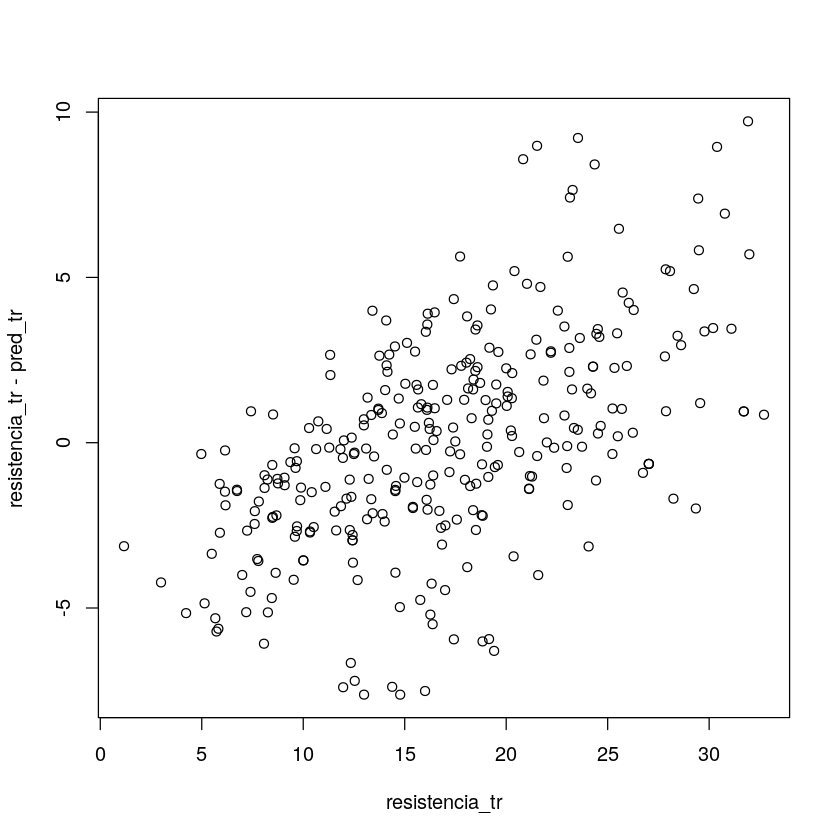

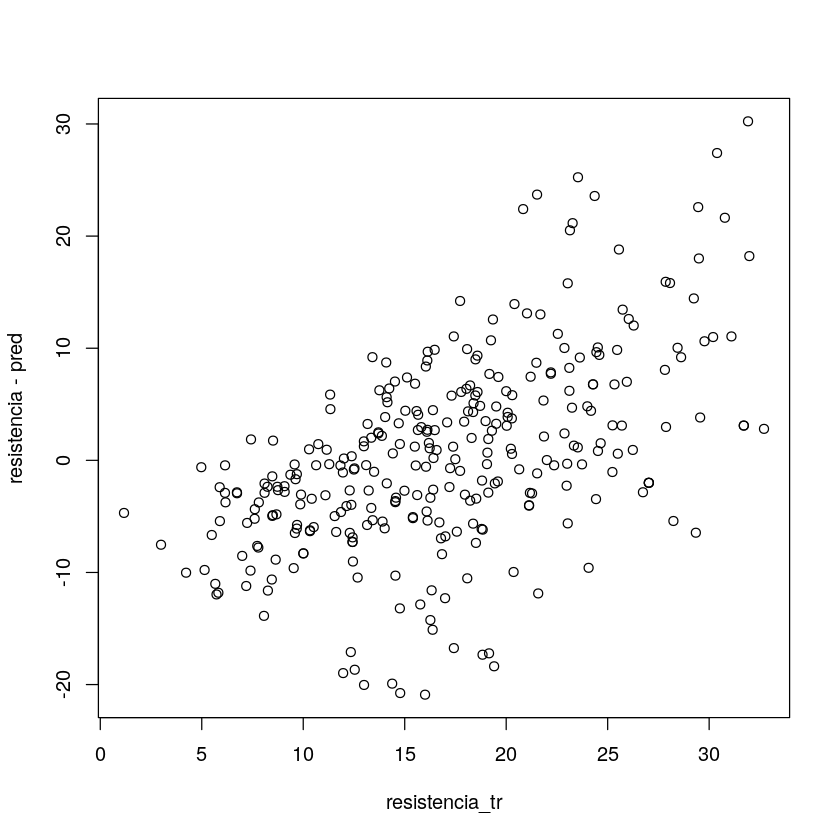

In [13]:
model_concrete_poli_tr<-lm(
    resistencia_tr~poly(cemento,2)+poly(escoria,2)+poly(cenizas,2)+poly(agua,2)+
    poly(plastificante,2)+poly(aggrueso,2)+poly(agfino,2)+poly(edad,2),
                      concrete_transformed.train)


concrete_transformed.test<-concrete_test.df
concrete_transformed.test$resistencia_tr<-my_transform(concrete_test.df$resistencia,l)
concrete_transformed.test$pred_tr<-predict(model_concrete_poli_tr,concrete_transformed.test)
concrete_transformed.test$pred<-my_inv_transform(concrete_transformed.test$pred_tr,l)

with(concrete_transformed.test,{
        
    print(caret::postResample(resistencia_tr,pred_tr))
    print(caret::postResample(resistencia,pred))
    plot(resistencia_tr, resistencia_tr-pred_tr)
    plot(resistencia_tr, resistencia-pred)
    })


     RMSE  Rsquared       MAE 
8.5418552 0.7588324 6.4947703 


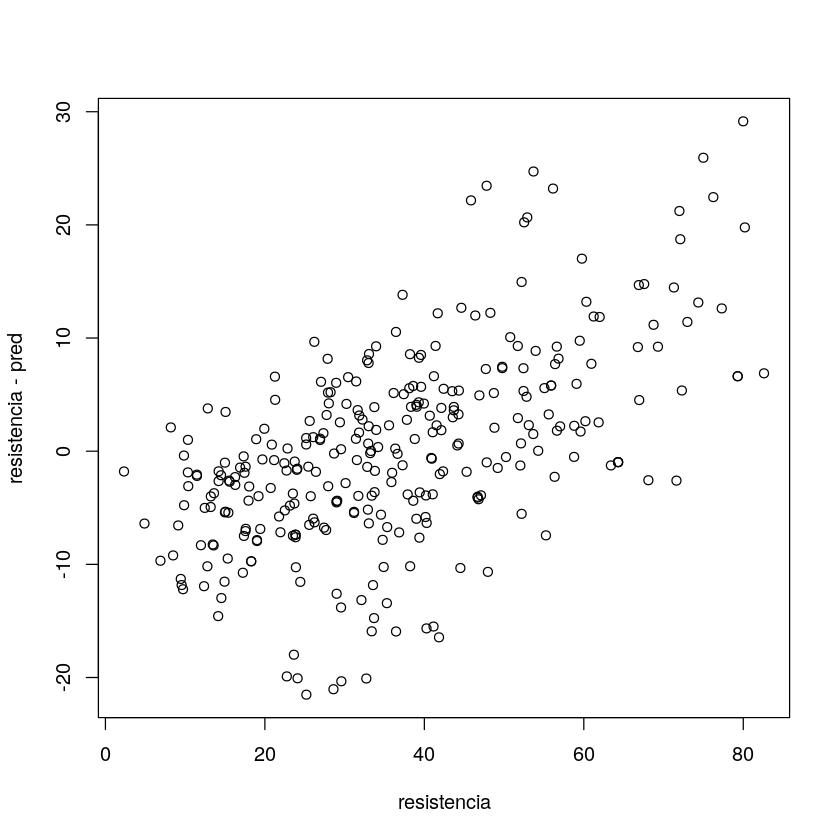

In [14]:
model_concrete_poli<-lm(
    resistencia~poly(cemento,2)+poly(escoria,2)+poly(cenizas,2)+poly(agua,2)+
    poly(plastificante,2)+poly(aggrueso,2)+poly(agfino,2)+poly(edad,2),
                      concrete_train.df)

concrete_test.df$pred<-predict(model_concrete_poli,concrete_test.df)

with(concrete_test.df,{            
    print(caret::postResample(resistencia,pred))    
    plot(resistencia, resistencia-pred)
    })


## Valores no disponibles / Missing Values

Son valores para los cuales no tenemos ninguna medida, se representan con un NA.

Pertenecen a valores perdidos que no se han podido recuperar, errores de medida, perdidas de datos, etc..

En R los detectamos con:

is.na(x)
y podemos reemplazar su valor con la media, moda, mediana, etc...

o simplemente eliminarlos: na.omit(x)

Si estamos trabajando con series temporales es posible que queramos hacer una interpolación de los valores perdidos:

zoo::na.approx(x)

In [15]:
data<-c(1,3,NA,6)
data

[1]  1  3 NA  6

In [16]:
is.na(data)

[1] FALSE FALSE  TRUE FALSE

In [17]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
#mouse_data<-mouse[,c(2:78,79)]
summary(mouse)

   MouseID             DYRK1A_N         ITSN1_N           BDNF_N      
 Length:1080        Min.   :0.1453   Min.   :0.2454   Min.   :0.1152  
 Class :character   1st Qu.:0.2881   1st Qu.:0.4734   1st Qu.:0.2874  
 Mode  :character   Median :0.3664   Median :0.5658   Median :0.3166  
                    Mean   :0.4258   Mean   :0.6171   Mean   :0.3191  
                    3rd Qu.:0.4877   3rd Qu.:0.6980   3rd Qu.:0.3482  
                    Max.   :2.5164   Max.   :2.6027   Max.   :0.4972  
                    NA's   :3        NA's   :3        NA's   :3       
     NR1_N           NR2A_N          pAKT_N           pBRAF_N       
 Min.   :1.331   Min.   :1.738   Min.   :0.06324   Min.   :0.06404  
 1st Qu.:2.057   1st Qu.:3.156   1st Qu.:0.20575   1st Qu.:0.16459  
 Median :2.297   Median :3.761   Median :0.23118   Median :0.18230  
 Mean   :2.297   Mean   :3.844   Mean   :0.23317   Mean   :0.18185  
 3rd Qu.:2.528   3rd Qu.:4.440   3rd Qu.:0.25726   3rd Qu.:0.19742  
 Max.   :3.758   M

In [18]:
sapply(mouse,function(x) sum(is.na(x)))

MouseID        DYRK1A_N         ITSN1_N          BDNF_N           NR1_N 
              0               3               3               3               3 
         NR2A_N          pAKT_N         pBRAF_N       pCAMKII_N         pCREB_N 
              3               3               3               3               3 
         pELK_N          pERK_N          pJNK_N          PKCA_N          pMEK_N 
              3               3               3               3               3 
         pNR1_N         pNR2A_N         pNR2B_N        pPKCAB_N          pRSK_N 
              3               3               3               3               3 
          AKT_N          BRAF_N        CAMKII_N          CREB_N           ELK_N 
              3               3               3               3              18 
          ERK_N         GSK3B_N           JNK_N           MEK_N          TRKA_N 
              3               3               3               7               3 
          RSK_N           APP_N      Bcatenin_N          SOD1_N          MTOR_N 
              3               3              18               3               3 
          P38_N         pMTOR_N         DSCR1_N         AMPKA_N          NR2B_N 
              3               3               3               3               3 
        pNUMB_N        RAPTOR_N         TIAM1_N        pP70S6_N          NUMB_N 
              3               3               3               3               0 
        P70S6_N        pGSK3B_N         pPKCG_N          CDK5_N            S6_N 
              0               0               0               0               0 
       ADARB1_N    AcetylH3K9_N          RRP1_N           BAX_N           ARC_N 
              0               0               0               0               0 
        ERBB4_N          nNOS_N           Tau_N          GFAP_N         GluR3_N 
              0               0               0               0               0 
        GluR4_N          IL1B_N         P3525_N        pCASP9_N         PSD95_N 
              0               0               0               0               0 
         SNCA_N     Ubiquitin_N pGSK3B_Tyr216_N           SHH_N           BAD_N 
              0               0               0               0             213 
         BCL2_N           pS6_N         pCFOS_N           SYP_N       H3AcK18_N 
            285               0              75               0             180 
         EGR1_N        H3MeK4_N          CaNA_N        Genotype       Treatment 
            210             270               0               0               0 
       Behavior           class 
              0               0

In [19]:
which(is.na(mouse$pMTOR_N))

[1] 988 989 990

In [20]:
mouse_no_na<-na.omit(mouse)
nrow(mouse_no_na)

[1] 552

In [21]:
#Los índices que NO ha eliminado son:
length(na.action(na.omit(mouse)))

[1] 528

In [22]:
str(na.action(na.omit(mouse)))

 'omit' Named int [1:528] 1 2 3 4 5 6 7 8 9 10 ...
 - attr(*, "names")= chr [1:528] "1" "2" "3" "4" ...


In [23]:
nrow(mouse)
nrow(na.omit(mouse))
nrow(mouse)-nrow(na.omit(mouse))

[1] 1080

[1] 552

[1] 528

In [25]:
na.action(na.omit(mouse))

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  65   66   67   68   69   70   71   72   73   74   75  106  107  108  109  110 
  65   66   67   68   69   70   71   72   73   74   75  106  107  108  109  110 
 111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126 
 111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126 
 127  128  129  130  131  13

In [26]:
head(na.omit(mouse))

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,⋯,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
76,3415_1,0.6497813,0.8286964,0.4058618,2.921435,5.167979,0.2071741,0.1766404,3.728084,0.2392826,⋯,0.1293628,0.4869115,0.1251522,0.1468649,0.1435166,1.627181,Control,Memantine,C/S,c-CS-m
77,3415_2,0.6164807,0.8419742,0.3885837,2.862575,5.194163,0.2234335,0.1677253,3.648240,0.2210300,⋯,0.1430844,0.4678333,0.1128567,0.1611316,0.1457194,1.562096,Control,Memantine,C/S,c-CS-m
78,3415_3,0.6374243,0.8528818,0.4005615,2.968155,5.350820,0.2087902,0.1732608,3.814545,0.2223002,⋯,0.1476734,0.4625013,0.1164328,0.1605935,0.1428788,1.571868,Control,Memantine,C/S,c-CS-m
79,3415_4,0.5768145,0.7553900,0.3483463,2.624901,4.727509,0.2058923,0.1611920,3.778530,0.1941528,⋯,0.1212896,0.4791095,0.1028311,0.1442380,0.1416812,1.646608,Control,Memantine,C/S,c-CS-m
80,3415_5,0.5425448,0.7579173,0.3500507,2.634509,4.735602,0.2105263,0.1656711,3.871971,0.1942973,⋯,0.1426175,0.4383545,0.1106140,0.1556674,0.1464082,1.607631,Control,Memantine,C/S,c-CS-m
81,3415_6,0.5699176,0.7610777,0.3439100,2.598085,4.764640,0.2039635,0.1644400,3.843465,0.1930528,⋯,0.1338177,0.4613140,0.1142573,0.1559240,0.1421386,1.506520,Control,Memantine,C/S,c-CS-m


Podemos reemplazar su valor por la media de esa columna.

Vamos a ver tres formas diferentes de hacer lo mismo.

In [27]:
mouse_data<-mouse[,2:77]

In [28]:
for (i in 1:ncol(mouse_data)){
    mouse_data[,i]<-replace(mouse_data[,i],is.na(mouse_data[,i]),mean(mouse_data[,i],na.rm=T))
}

In [29]:
mouse_data=as.data.frame(sapply(mouse_data,function(mcol) replace(mcol, is.na(mcol), mean(mcol, na.rm = TRUE))))

In [30]:
library(zoo)
mouse_data=na.aggregate(mouse_data,FUN=mean)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## Outliers

Un outlier es una obervación que se encuentra a una distancia **anormal** de otros valores de la muestra.

La definición está abierta, todo depende de que datos se quieran descartar (reemplazar por NA). 

Los podemos identificar mediate diagramas de dispersión o diagramas de cajas.



Una forma podría ser considerar outlier todo lo que esté fuera del rango:
\\[
{\big [}Q_{1}-k(Q_{3}-Q_{1}),Q_{3}+k(Q_{3}-Q_{1}){\big ]}
\\]
Donde un valor típico de $k$ es 1.5
 
Lo podemos reemplazar por un valor extremo, por la media, moda, etc...o descartarlo al igual que los NA